In [2]:
import pandas as pd
from pathlib import Path
from train import load_df, clean_df
from config import TRAIN_TEST_SPLIT_PERCENT
from config import TICKERS
import logging
import sys

logging.getLogger("matplotlib").setLevel(logging.WARNING)
# logging.getLogger("Coding").setLevel(logging.WARNING)


%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = clean_df(load_df())
train_size = df.index.values[-1] - int(
    df.index.values[-1] * TRAIN_TEST_SPLIT_PERCENT
)
train_df = df.loc[:train_size]
trade_df = df.loc[train_size + 1 :]
trade_df = trade_df.pivot(index="Date", columns="Ticker", values="Close").rename_axis(None, axis=1)
trade_df = trade_df[sorted(trade_df.columns.tolist())].reset_index()
trade_df

[27/Jul/2023 20:32:34] DEBUG [parquet.__init__:28] Using orjson encoder/decoder
[27/Jul/2023 20:32:34] INFO [train.load_df:98] Data loaded successfully into Dataframe
|    | Date                      | Ticker        |   Close |
|---:|:--------------------------|:--------------|--------:|
|  0 | 2022-02-08 09:15:00+05:30 | BAJAJFINSV.NS | 3190.21 |
|  1 | 2022-02-08 09:15:00+05:30 | BAJFINANCE.NS | 6991.6  |
|  2 | 2022-02-08 09:15:00+05:30 | BHARTIARTL.NS |  712.95 |
|  3 | 2022-02-08 09:15:00+05:30 | EICHERMOT.NS  | 2615    |
|  4 | 2022-02-08 09:15:00+05:30 | TCS.NS        | 3741.6  |
[27/Jul/2023 20:32:34] INFO [train.clean_df:127] Cleaned Dataframe 
|    | Date                      | Ticker        |   Close |   Buy/Sold/Hold |
|---:|:--------------------------|:--------------|--------:|----------------:|
|  0 | 2022-02-08 09:15:00+05:30 | BAJAJFINSV.NS | 3190.21 |               0 |
|  0 | 2022-02-08 09:15:00+05:30 | BAJFINANCE.NS | 6991.6  |               0 |
|  0 | 2022-02-08 09:1

,Date,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,EICHERMOT.NS,TCS.NS
0,2023-05-05 12:15:00+05:30,1374.300049,6424.399902,784.049988,3370.750000,3222.600098
1,2023-05-05 13:15:00+05:30,1369.849976,6418.000000,785.099976,3357.699951,3228.850098
2,2023-05-05 14:15:00+05:30,1361.000000,6391.549805,787.000000,3354.050049,3230.550049
3,2023-05-05 15:15:00+05:30,1359.650024,6378.600098,788.200012,3355.100098,3230.699951
4,2023-05-08 09:15:00+05:30,1383.650024,6538.700195,786.599976,3379.949951,3236.199951
...,...,...,...,...,...,...
370,2023-07-21 11:15:00+05:30,1629.900024,7547.200195,886.349976,3312.750000,3398.750000
371,2023-07-21 12:15:00+05:30,1641.949951,7605.850098,889.049988,3314.899902,3389.199951
372,2023-07-21 13:15:00+05:30,1632.050049,7622.700195,890.000000,3313.350098,3385.000000
373,2023-07-21 14:15:00+05:30,1633.000000,7582.799805,886.750000,3316.949951,3368.250000


In [5]:
results_dir = Path("results")
results_dir.mkdir(parents=True, exist_ok=True)
df = pd.read_parquet(results_dir/"all-model-eval-results.parquet", engine="fastparquet")
df

,model,holdings,reward,TCS.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BHARTIARTL.NS,EICHERMOT.NS
0,trained_models/ppo/100000/PAST_6-3-2-1_HOUR/11...,99958.572001,4.142800,0.0,0.0,10.0,10.0,0.0
1,trained_models/ppo/100000/PAST_6-3-2-1_HOUR/11...,99899.662721,5.890928,0.0,0.0,20.0,20.0,0.0
2,trained_models/ppo/100000/PAST_6-3-2-1_HOUR/11...,99929.723441,3.006072,0.0,2.0,10.0,23.0,0.0
3,trained_models/ppo/100000/PAST_6-3-2-1_HOUR/11...,100811.952251,88.222881,1.0,2.0,0.0,23.0,0.0
4,trained_models/ppo/100000/PAST_6-3-2-1_HOUR/11...,101027.519836,21.556758,7.0,2.0,0.0,23.0,0.0
...,...,...,...,...,...,...,...,...
23933,trained_models/ppo/100000/PAST_6-5-1_HOUR/1197...,111239.417656,0.366947,16.0,0.0,0.0,15.0,0.0
23934,trained_models/ppo/100000/PAST_6-5-1_HOUR/1197...,111434.041619,19.462396,16.0,4.0,0.0,15.0,0.0
23935,trained_models/ppo/100000/PAST_6-5-1_HOUR/1197...,111316.483151,11.755847,16.0,4.0,0.0,16.0,0.0
23936,trained_models/ppo/100000/PAST_6-5-1_HOUR/1197...,111228.524114,8.795904,17.0,0.0,0.0,25.0,0.0


In [6]:
best_model = df.groupby(["model"]).last().sort_values("holdings", ascending=False).iloc[0].name
best_model

'trained_models/ppo/100000/PAST_6-3-1_HOUR/121732.zip'

In [7]:
best_model_df = df[df["model"] == best_model].reset_index(drop=True)
first_row = {
    "model": best_model,
    "holdings": 100_000,
    "reward": 0
}
first_row.update({ticker:0 for ticker in TICKERS})
first_row = pd.DataFrame([first_row])
best_model_df = pd.concat([first_row, best_model_df]).reset_index(drop=True)
best_model_df.columns = [col+" Buy/Sell" if ".NS" in col else col for col in best_model_df.columns]
best_model_df

,model,holdings,reward,TCS.NS Buy/Sell,BAJFINANCE.NS Buy/Sell,BAJAJFINSV.NS Buy/Sell,BHARTIARTL.NS Buy/Sell,EICHERMOT.NS Buy/Sell
0,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,100000.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,99954.012999,4.598700,10.0,0.0,0.0,0.0,10.0
2,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,99861.324857,9.268814,10.0,8.0,3.0,0.0,0.0
3,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,99715.095181,14.622968,20.0,11.0,3.0,0.0,0.0
4,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,101952.779796,223.768461,19.0,11.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
370,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,122207.979388,17.600952,37.0,8.0,0.0,0.0,0.0
371,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,123123.025897,91.504651,37.0,8.0,0.0,0.0,0.0
372,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,122891.530291,23.149561,37.0,8.0,0.0,0.0,0.0
373,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,122608.639760,28.289053,27.0,10.0,0.0,0.0,0.0


In [8]:
trade_df = pd.concat([trade_df, best_model_df], axis=1)
trade_df

,Date,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,EICHERMOT.NS,TCS.NS,model,holdings,reward,TCS.NS Buy/Sell,BAJFINANCE.NS Buy/Sell,BAJAJFINSV.NS Buy/Sell,BHARTIARTL.NS Buy/Sell,EICHERMOT.NS Buy/Sell
0,2023-05-05 12:15:00+05:30,1374.300049,6424.399902,784.049988,3370.750000,3222.600098,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,100000.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,2023-05-05 13:15:00+05:30,1369.849976,6418.000000,785.099976,3357.699951,3228.850098,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,99954.012999,4.598700,10.0,0.0,0.0,0.0,10.0
2,2023-05-05 14:15:00+05:30,1361.000000,6391.549805,787.000000,3354.050049,3230.550049,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,99861.324857,9.268814,10.0,8.0,3.0,0.0,0.0
3,2023-05-05 15:15:00+05:30,1359.650024,6378.600098,788.200012,3355.100098,3230.699951,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,99715.095181,14.622968,20.0,11.0,3.0,0.0,0.0
4,2023-05-08 09:15:00+05:30,1383.650024,6538.700195,786.599976,3379.949951,3236.199951,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,101952.779796,223.768461,19.0,11.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2023-07-21 11:15:00+05:30,1629.900024,7547.200195,886.349976,3312.750000,3398.750000,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,122207.979388,17.600952,37.0,8.0,0.0,0.0,0.0
371,2023-07-21 12:15:00+05:30,1641.949951,7605.850098,889.049988,3314.899902,3389.199951,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,123123.025897,91.504651,37.0,8.0,0.0,0.0,0.0
372,2023-07-21 13:15:00+05:30,1632.050049,7622.700195,890.000000,3313.350098,3385.000000,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,122891.530291,23.149561,37.0,8.0,0.0,0.0,0.0
373,2023-07-21 14:15:00+05:30,1633.000000,7582.799805,886.750000,3316.949951,3368.250000,trained_models/ppo/100000/PAST_6-3-1_HOUR/1217...,122608.639760,28.289053,27.0,10.0,0.0,0.0,0.0


In [11]:
trade_df.iloc[-1]["Date"] - trade_df.iloc[0]["Date"]

Timedelta('77 days 03:00:00')

In [9]:
daily_return_df = trade_df[["Date", "holdings"]].copy()
daily_return_df.loc[:, "daily_return"] = daily_return_df["holdings"].pct_change(1)
daily_return_df = daily_return_df.set_index("Date")
daily_return_df = pd.Series(daily_return_df["daily_return"], index=daily_return_df.index)
daily_return_df

Date
2023-05-05 12:15:00+05:30         NaN
2023-05-05 13:15:00+05:30   -0.000460
2023-05-05 14:15:00+05:30   -0.000927
2023-05-05 15:15:00+05:30   -0.001464
2023-05-08 09:15:00+05:30    0.022441
                               ...   
2023-07-21 11:15:00+05:30   -0.001438
2023-07-21 12:15:00+05:30    0.007488
2023-07-21 13:15:00+05:30   -0.001880
2023-07-21 14:15:00+05:30   -0.002302
2023-07-21 15:15:00+05:30    0.000000
Name: daily_return, Length: 375, dtype: float64

In [10]:
from pyfolio import timeseries
perf_stats_all = timeseries.perf_stats(
    returns=daily_return_df,
    positions=None,
    transactions=None,
    turnover_denom="AGB",
)
perf_stats_all

/home/dhruv/.local/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Annual return          0.146796
Cumulative returns     0.226086
Annual volatility      0.076204
Sharpe ratio           1.840318
Calmar ratio           4.976340
Stability              0.926634
Max drawdown          -0.029499
Omega ratio            1.505914
Sortino ratio          3.744202
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.234050
Daily value at risk   -0.009044
dtype: float64

Start date,2023-05-05
End date,2023-07-21
Total months,17
,Backtest
Annual return,14.7%
Cumulative returns,22.6%
Annual volatility,7.6%
Sharpe ratio,1.84
Calmar ratio,4.98
Stability,0.93
Max drawdown,-2.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2023-05-05,2023-05-05,2023-05-05,1
1,0.00,2023-05-05,2023-05-05,2023-05-05,1
2,0.00,2023-05-05,2023-05-05,2023-05-05,1
3,0.00,2023-05-05,2023-05-05,2023-05-05,1
4,0.00,2023-05-05,2023-05-05,2023-05-05,1


/home/dhruv/.local/lib/python3.10/site-packages/pyfolio/tears.py:925: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn('Passed returns do not overlap with any'


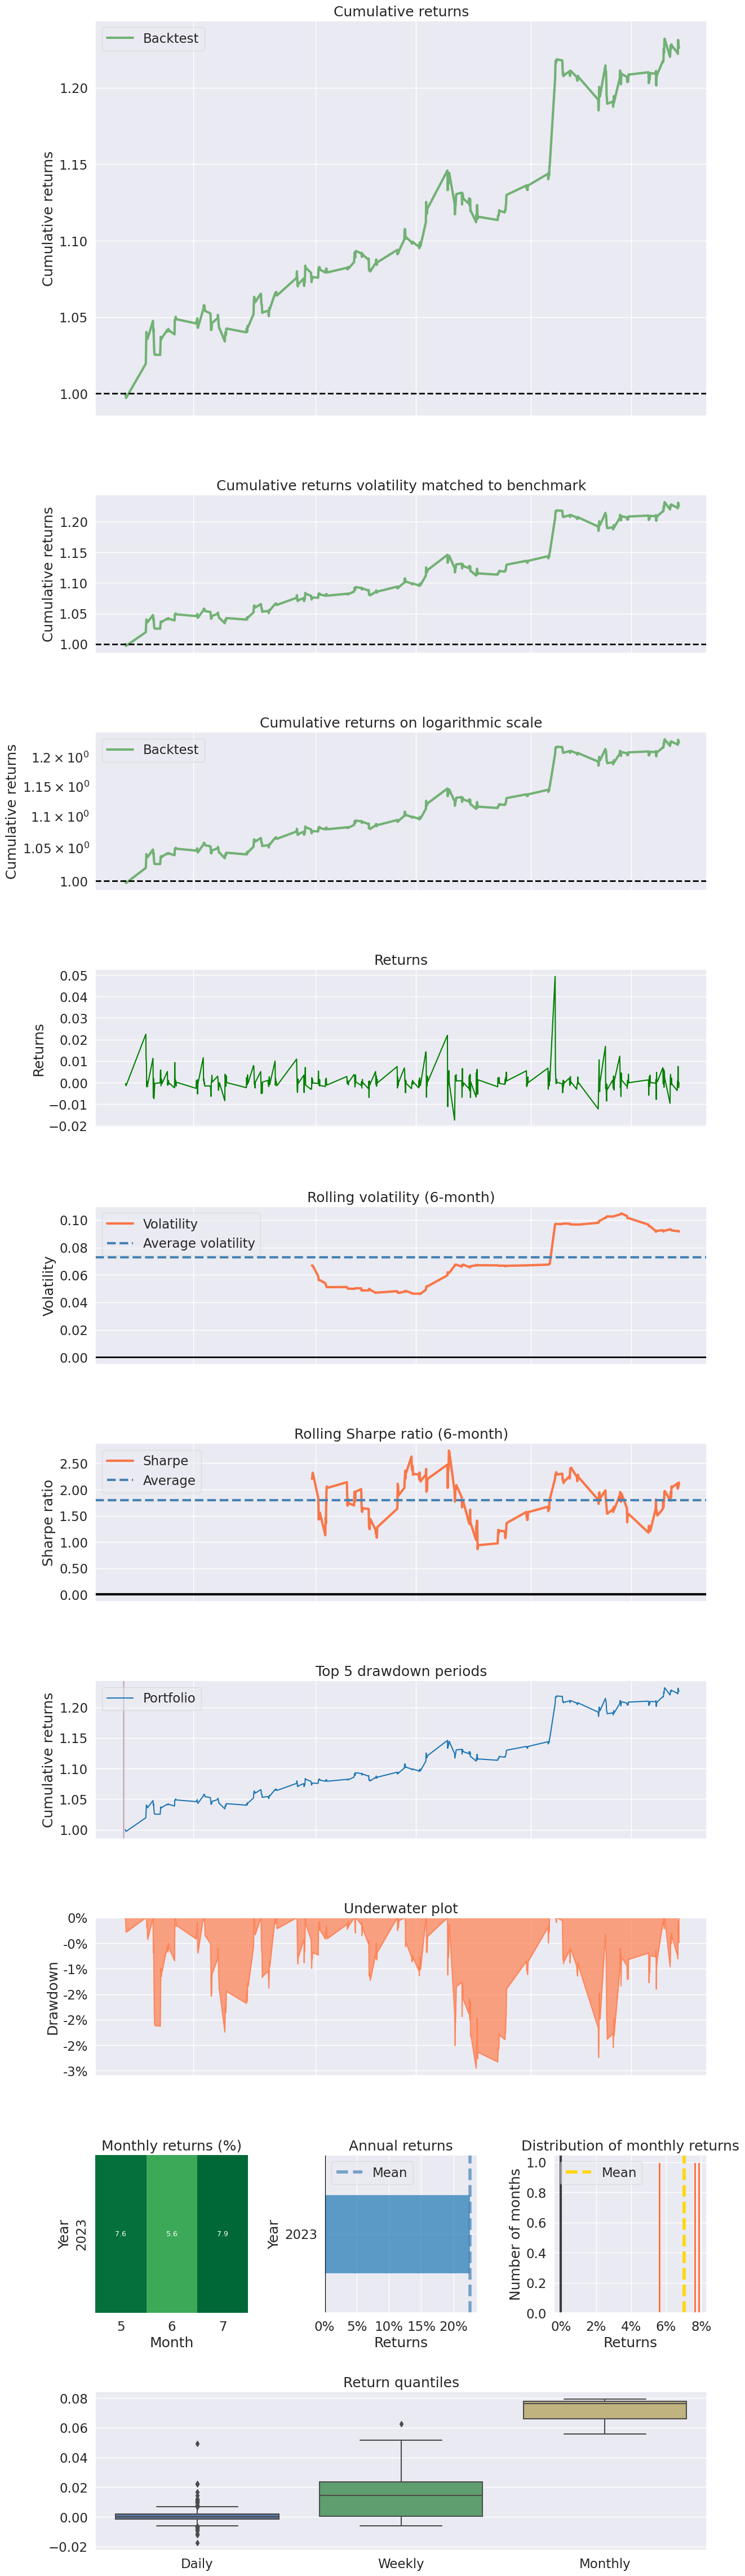

In [11]:
from pyfolio.plotting import plotting_context
from pyfolio import create_full_tear_sheet

create_full_tear_sheet(returns=daily_return_df)